In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

C:\Users\Ishika Shukla\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from sklearn.metrics import r2_score

In [10]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import RandomForestRegressor

# Loading dataset
df = pd.read_csv('Dataset3.csv')

variables = ['Lat', 'Lon', 'Distance', 'Bearing', 'Gain']
X = df[variables]
y = df['RSRP']

espaco_de_parametros_rf = {
    "n_estimators": [20, 100],
    "criterion": ['squared_error'],
    "max_depth": [10, 20],
    "min_samples_split": [2, 8],
    "max_features": [2, 3]
}

search_rf = GridSearchCV(
    RandomForestRegressor(),
    espaco_de_parametros_rf,
    scoring='neg_root_mean_squared_error',
    cv=KFold(n_splits=5)
)

search_rf.fit(X, y)
results_rf = pd.DataFrame(search_rf.cv_results_)
results_rf.to_csv('rf_results.csv', index=False)
#print(results_rf)



In [11]:
results_rf = pd.DataFrame(search_rf.cv_results_)
results_rf.to_csv('RandomForest_results.csv', index=False)
#print(results_rf)

best_rf_params = search_rf.best_params_
best_rf_rmse = -search_rf.best_score_

print("Random Forest - Best Parameters:", best_rf_params)
print("Random Forest - Best RMSE:", best_rf_rmse)



# Random Forest
rf_predictions = search_rf.best_estimator_.predict(X)
rf_r2 = r2_score(y, rf_predictions)

print("Random Forest - R^2:", rf_r2)

Random Forest - Best Parameters: {'criterion': 'squared_error', 'max_depth': 10, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest - Best RMSE: 6.924628412226255
Random Forest - R^2: 0.9563533321805123


In [12]:
#adaboost
from sklearn.ensemble import AdaBoostRegressor
# Load your dataset
# Define the parameter space for AdaBoostRegressor

ab_parameter_space = {
"n_estimators": [10, 20, 50, 100, 250],
"learning_rate": [0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.7, 0.9, 1, 1.2, 2],
"loss": ['linear', 'square', 'exponential']
}

search = GridSearchCV(
AdaBoostRegressor(),
ab_parameter_space,
scoring='neg_root_mean_squared_error',
cv=KFold(n_splits=5),
n_jobs=-1 
)
search.fit(X, y)

results = pd.DataFrame(search.cv_results_)
results.to_csv('Adaboost_results.csv', index=False)


best_ab_params = search.best_params_
best_ab_rmse = -search.best_score_

print("AdaBoost - Best Parameters:", best_ab_params)
print("AdaBoost - Best RMSE:", best_ab_rmse)

ab_predictions = search.best_estimator_.predict(X)
ab_r2 = r2_score(y, ab_predictions)

print("AdaBoost - R^2:", ab_r2)

AdaBoost - Best Parameters: {'learning_rate': 2, 'loss': 'square', 'n_estimators': 50}
AdaBoost - Best RMSE: 7.251031070622751
AdaBoost - R^2: 0.7262607267437253


In [13]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.tree import DecisionTreeRegressor

df = pd.read_csv('Dataset3.csv')

variables = ['Lat', 'Lon', 'Distance', 'Bearing', 'Gain']
X = df[variables]
y = df['RSRP']

# Define the parameter space for DecisionTreeRegressor
espaco_de_parametros = {
    "criterion": ['mse', 'friedman_mse', 'mae'],
    "splitter": ['best', 'random'],
    "max_depth": [2, 5, 10, 20, 30, 50, 100, 120, 150, 200],
    "max_features": ['sqrt', 'log2', 2]
}

search_dt = GridSearchCV(
    DecisionTreeRegressor(),
    espaco_de_parametros,
    scoring='neg_root_mean_squared_error',
    cv=KFold(n_splits=5)
)

search_dt.fit(X, y)

results = pd.DataFrame(search_dt.cv_results_)
results.to_csv('dt_results.csv', index=False)
#print(results)

best_dt_params = search_dt.best_params_
best_dt_rmse = -search_dt.best_score_

print("Decision Tree - Best Parameters:", best_dt_params)
print("Decision Tree - Best RMSE:", best_dt_rmse)

dt_predictions = search_dt.best_estimator_.predict(X)
dt_r2 = r2_score(y, dt_predictions)

print("Decision Tree - R^2:", dt_r2)


Decision Tree - Best Parameters: {'criterion': 'friedman_mse', 'max_depth': 200, 'max_features': 2, 'splitter': 'best'}
Decision Tree - Best RMSE: 7.400491993920518
Decision Tree - R^2: 1.0


In [14]:
#knn model
from sklearn.neighbors import KNeighborsRegressor

knn_parameter_space = {
"n_neighbors": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25, 30],
"p": [1, 2]
}
search_knn = GridSearchCV(

KNeighborsRegressor(),
knn_parameter_space,
scoring='neg_root_mean_squared_error',
cv=KFold(n_splits=5)
)

search_knn.fit(X, y)
results = pd.DataFrame(search_knn.cv_results_)
results.to_csv('KNN_results.csv', index=False)
#print(results)

best_knn_params = search_knn.best_params_
best_knn_rmse = -search_knn.best_score_

print("KNN - Best Parameters:", best_knn_params)
print("KNN - Best RMSE:", best_knn_rmse)

knn_predictions = search_knn.best_estimator_.predict(X)
knn_r2 = r2_score(y, knn_predictions)

print("KNN - R^2:", knn_r2)

KNN - Best Parameters: {'n_neighbors': 12, 'p': 1}
KNN - Best RMSE: 7.203803712475245
KNN - R^2: 0.8325469578697906


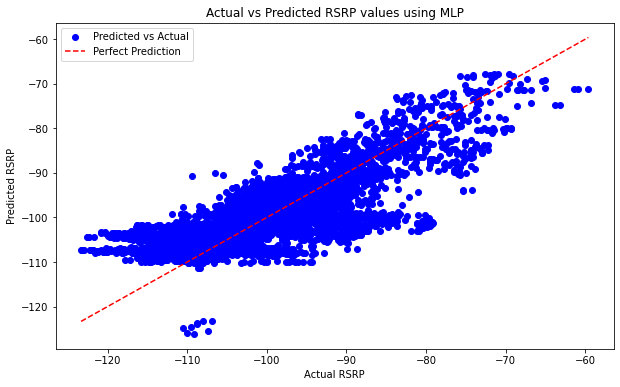

In [15]:
from sklearn.neural_network import MLPRegressor

# Define the neural network architecture
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=100)

# Train the model
model.fit(X, y)

# Make predictions
nn_predictions = model.predict(X)

# Evaluate the model
nn_rmse = model.score(X, y)

import matplotlib.pyplot as plt

# Plotting the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y, nn_predictions, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('Actual RSRP')
plt.ylabel('Predicted RSRP')
plt.title('Actual vs Predicted RSRP values using MLP')
plt.legend()
plt.show()


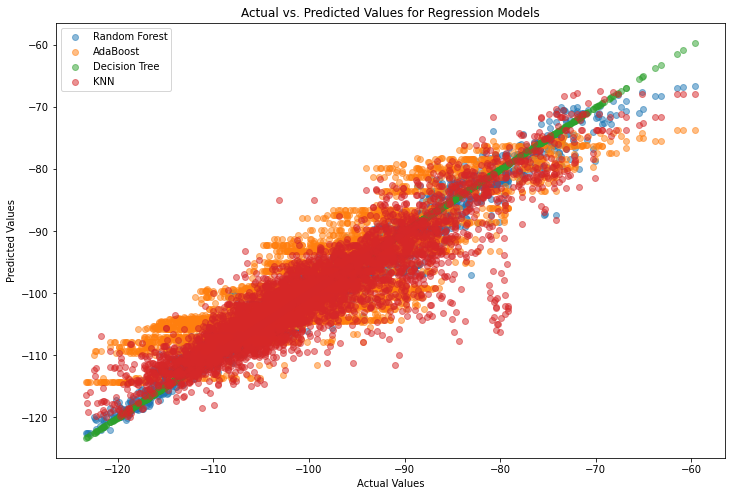

In [16]:
plt.figure(figsize=(12, 8))

# Random Forest
plt.scatter(y, rf_predictions, label='Random Forest', alpha=0.5)

# AdaBoost
plt.scatter(y, ab_predictions, label='AdaBoost', alpha=0.5)

# Decision Tree
plt.scatter(y, dt_predictions, label='Decision Tree', alpha=0.5)

# KNN
plt.scatter(y, knn_predictions, label='KNN', alpha=0.5)

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.title('Actual vs. Predicted Values for Regression Models')
plt.show()


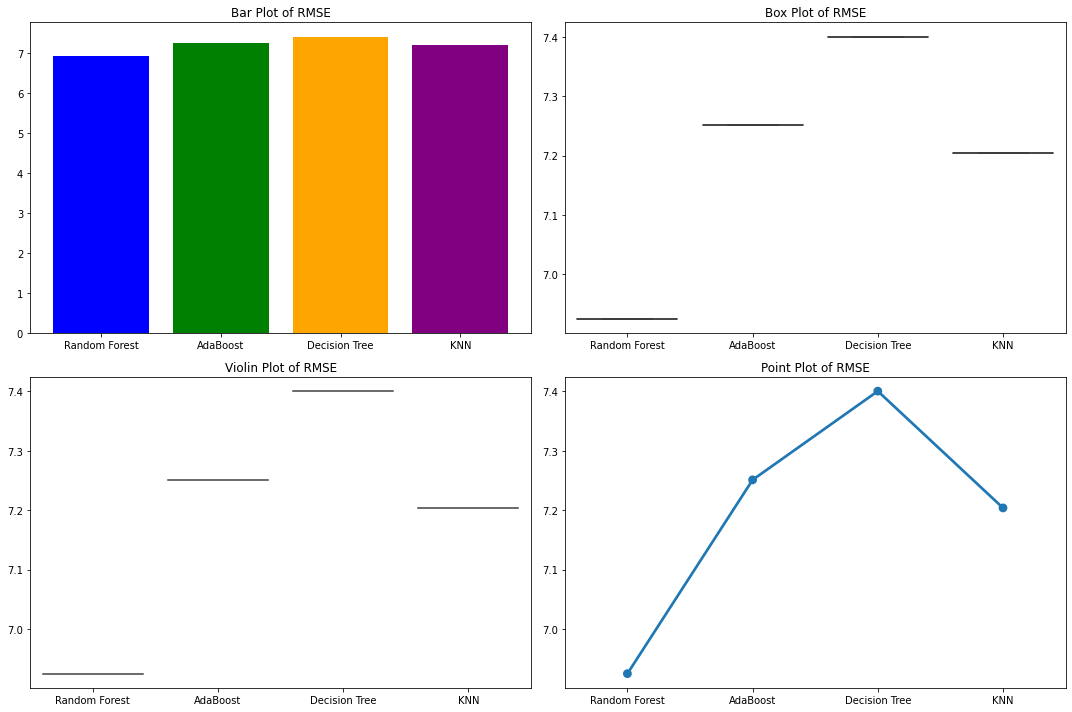

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the results from grid search stored in busca_rf, busca, busca_dt, and busca_knn

# Extracting RMSE values
rmse_rf = -search_rf.best_score_
rmse_ab = -search.best_score_
rmse_dt = -search_dt.best_score_
rmse_knn = -search_knn.best_score_

models = ['Random Forest', 'AdaBoost', 'Decision Tree', 'KNN']
rmse_values = [rmse_rf, rmse_ab, rmse_dt, rmse_knn]

# Creating subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Bar Plot
axes[0, 0].bar(models, rmse_values, color=['blue', 'green', 'orange', 'purple'])
axes[0, 0].set_title('Bar Plot of RMSE')

# Box Plot
sns.boxplot(x=models, y=rmse_values, ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of RMSE')

# Violin Plot
sns.violinplot(x=models, y=rmse_values, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot of RMSE')

# Point Plot
sns.pointplot(x=models, y=rmse_values, markers='o', ax=axes[1, 1])
axes[1, 1].set_title('Point Plot of RMSE')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


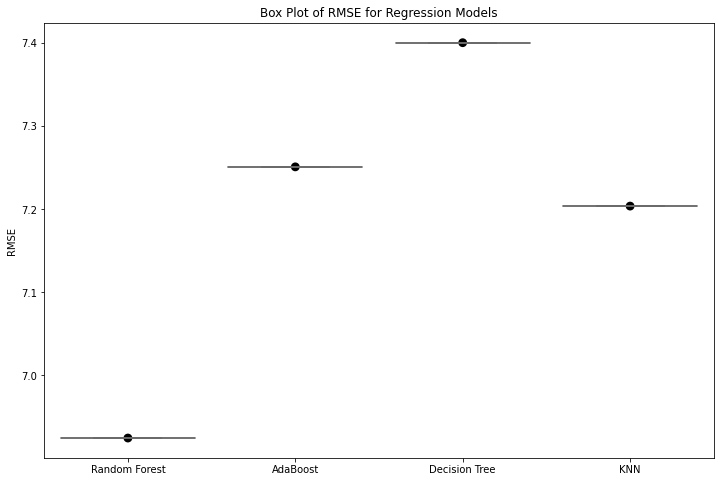

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the results from grid search stored in busca_rf, busca, busca_dt, and busca_knn

# Extracting RMSE values
rmse_rf = -search_rf.best_score_
rmse_ab = -search.best_score_
rmse_dt = -search_dt.best_score_
rmse_knn = -search_knn.best_score_

models = ['Random Forest', 'AdaBoost', 'Decision Tree', 'KNN']
rmse_values = [rmse_rf, rmse_ab, rmse_dt, rmse_knn]

# Create a box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x=models, y=rmse_values, palette='Set3')
plt.title('Box Plot of RMSE for Regression Models')
plt.ylabel('RMSE')

# Add a point plot on top to show the central tendency
sns.pointplot(x=models, y=rmse_values, color='black', markers='o', join=False, ci='sd')

plt.show()
